# Продвинутый Python, лекция 2

**Лектор:** Петров Тимур

**Семинаристы:** Бузаев Федор, Дешеулин Олег, Коган Александра, Васина Олеся, Садуллаев Музаффар

Сегодня мы еще раз поговорим про ООП, помянем первый курс  ¯\\_(ツ)_/¯

А также поговорим про Typing и Pydantic

## Принципы ООП

ООП стоит на 4 китах:

* Абстракция - использование только тех параметров в классах, которые являются существенными (например, для моделирования попугая не нужно знать, что ест каждый попугай отдельно. Важно, что он ест)

* Инкапсуляция - сокрытие методов и данных класса внутри него самого, которые не необходимы для взаимодействия с ним (например, для взаимодействия человека и попугая не нужно знать полное устройство попугая и внутренних процессов, как и попугаю не нужно устройство человека для взаимодействия)

* Наследование - возможность расширить или сузить класс и дополнить его (например, из класса попугаев мы создаем отдельно подкласс какаду, внутри которого есть большие какаду и есть отдельно еще маленькие кореллы)

* Полиморфизм - возможность реализовать один и тот же метод разными способами (например, для жизни одни попугаи ищут дупло, другие строят гнездо)

## Вспоминаем

### Атрибуты класса и слоты

У класса есть свойства, которые характеризуют данный класс. И эти свойства называются – **атрибуты**

По умолчанию у любого класса есть 4 атрибута:

* dict - атрибут в виде словаря значений
* module - модуль, в котором хранится класс
* doc - описание класса
* weakref - технический атрибут для сборщика мусора -->

In [1]:
class Parrot:
    """
    Here is a class for parrots
    """
    pass

In [ ]:
Parrot.__dict__

In [2]:
parrot_a = Parrot()
print(parrot_a.__dict__) # есть свой и он пустой
print(parrot_a.__doc__) # своего нет, идет обращение к элементу класса Parrot
print(getattr(parrot_a, '__doc__')) # аналогично a.__doc__ функция, которая возвращает значение атрибута

{}

    Here is a class for parrots
    

    Here is a class for parrots
    


Что есть у класса и объектов? Правильно, атрибуты

Умеем ставить двумя способами: поставить через точку, либо с помощью setattr:



In [3]:
setattr(Parrot, 'color', "red")
Parrot.beak = True

In [4]:
Parrot.__dict__

mappingproxy({'__module__': '__main__',
              '__doc__': '\n    Here is a class for parrots\n    ',
              '__dict__': <attribute '__dict__' of 'Parrot' objects>,
              '__weakref__': <attribute '__weakref__' of 'Parrot' objects>,
              'color': 'red',
              'beak': True})

In [7]:
b = Parrot()
print(b.__dict__)
print(b.color)

{}
red


Умеем получать атрибуты, опять же два варианта:

1. Обращение через точку
2. Через getattr()

In [9]:
print(getattr(b, "color"))
print(getattr(b, "colour", "Idk")) ## отдельно можно указывать значение, если атрибута просто нет

red
Idk


Умем так добавлять сколько угодно и радоваться жизни. Если мы хотим на уровне класса запретить добавлять переменные (чтобы не произошло перезаписывания на каком-то из уровней), то используются слоты:

In [10]:
class Bird:
    """class example"""

    __slots__ = ['type_of_bird', 'wingspan']

    def __init__(self, type_of_bird: str, wingspan: float):  # self - это сам объект, сам __init__ никогда ничего не возвращает
        self.type_of_bird = type_of_bird
        self.wingspan = wingspan
        print("Bird was born")

a = Bird(type_of_bird="Falcon", wingspan=12)
b = Bird(type_of_bird="Gull", wingspan=8)
a.beak_size = 2 # не получится

Bird was born
Bird was born


AttributeError: 'Bird' object has no attribute 'beak_size'

In [11]:
a.__dict__ # его попросту не сущетсвует

AttributeError: 'Bird' object has no attribute '__dict__'

In [12]:
Bird.__dict__ # нет словаря, есть слоты и прям выделенные ячейки

mappingproxy({'__module__': '__main__',
              '__doc__': 'class example',
              '__slots__': ['type_of_bird', 'wingspan'],
              '__init__': <function __main__.Bird.__init__(self, type_of_bird: str, wingspan: float)>,
              'type_of_bird': <member 'type_of_bird' of 'Bird' objects>,
              'wingspan': <member 'wingspan' of 'Bird' objects>})

In [15]:
class MyClassFoo:
    """class example"""

    S = 3 # атрибут класса

    def __init__(self, x):
        self.x = x + self.S # задаем переменные для объекта класса
        print("Hello")

a = MyClassFoo(1)
b = MyClassFoo(2)

Hello
Hello


In [16]:
MyClassFoo.__dict__

mappingproxy({'__module__': '__main__',
              '__doc__': 'class example',
              'S': 3,
              '__init__': <function __main__.MyClassFoo.__init__(self, x)>,
              '__dict__': <attribute '__dict__' of 'MyClassFoo' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClassFoo' objects>})

In [17]:
a.__dict__

{'x': 4}

И напоминаем про связь слотов и атрибутов класса:

In [20]:
class MyClassFoo:

    __slots__ = ['x', 'z']
    S = 3

    """class example"""
    def __init__(self, x, y):  # self - это сам объект, сам __init__ никогда ничего не возвращает
        self.x = x
        self.z = y
        print("Hello")

a = MyClassFoo(1, 2)
print(a.S)

Hello
3


In [21]:
a.S = 'ahah' #оп, не можем затереть

AttributeError: 'MyClassFoo' object attribute 'S' is read-only

In [22]:
MyClassFoo.S = 5 ## но можем вот так
print(a.S)

5


### Методы класса

Поведение - это действия, которые происходят с объектом или выполняются объетком. Поведение, которое определяется классом объекта, называется ***методами*** этого класса. На программном уровне методы сравнимы с функциями в функциональном программировании, но, в отличие от последних, методы имеют доступ к атрибутам, в частности к переменным с данными, которые связаны с объектом. Так же как функции, методы принимают параметры и возвращают значение.


Давайте напишем поведение класса Попугай:

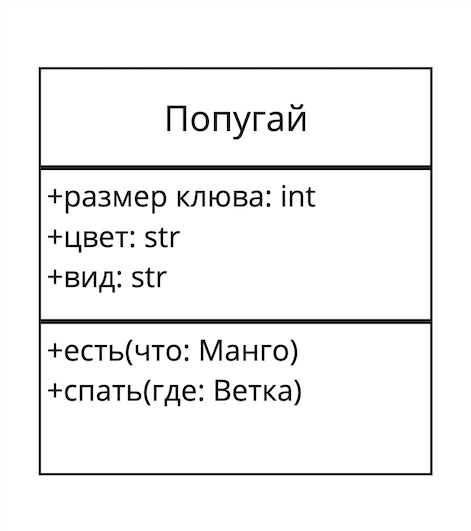

In [23]:
class Parrot:
    """
    Here is a class for parrots
    """

    def __init__(self,
                 beak_size: int=5,
                 color: str="red",
                 species: str="macaw"):

        self.beak_size = beak_size
        self.color = color
        self.species = species

    def eat(self, what: str) -> None:
        print(f"Parrot is eating {what}")

    def sleep(self, where: str) -> None:
        print(f"Parrot is sleeping {where}")

parrot_a = Parrot()

parrot_a.sleep("In the tree")
parrot_a.eat("Mango")

Parrot is sleeping In the tree
Parrot is eating Mango


Какие бывают методы?

* Статические (зачем добавляем? Чтобы не передавал сам инстанс)

* Классовые (передаем инфу только про класс, очень удобно)

* Абстрактные (когда хотим объявить, что тако метод должен быть)

In [25]:
from abc import abstractmethod

class Parrot:
    """
    Here is a class for parrots
    """

    def __init__(self,
                 beak_size: int=5,
                 color: str="red",
                 species: str="macaw") -> None:

        self.beak_size = beak_size
        self.color = color
        self.species = species

    def eat(self, what: str) -> None:
        print(f"Parrot is eating {what}")

    def sleep(self, where: str) -> None:
        print(f"Parrot is sleeping {where}")


    @staticmethod
    def is_same_species(parrot1, parrot2) -> bool:
        """
        Static method to compare if two parrots are of the same species.

        :param parrot1: First Parrot object
        :param parrot2: Second Parrot object
        :return: True if both parrots are of the same species, False otherwise
        """
        return parrot1.species == parrot2.species

    @classmethod
    def from_dict(cls, parrot_data: dict):
        """
        Class method to create a Parrot instance from a dictionary of attributes.

        :param parrot_data: A dictionary with keys 'beak_size', 'color', and 'species'
        :return: An instance of the Parrot class
        """
        return cls(beak_size=parrot_data.get('beak_size', 5),
                   color=parrot_data.get('color', 'red'),
                   species=parrot_data.get('species', 'macaw'))

    @abstractmethod
    def do_smth(self):
        pass


parrot_info = {
    'beak_size': 6,
    'color': 'green',
    'species': 'amazon'
}

parrot = Parrot.from_dict(parrot_info)
print(parrot.color)
print(parrot.species)

first_parrot = Parrot()
second_parrot = Parrot(species="cockatiel")

print(Parrot.is_same_species(first_parrot, second_parrot))

green
amazon
False


### Properties и уровни доступа

Ключевая задача моделирования объекта в ООП – определить, какой будет внешний интерфейс данного объекта.
Интерфейс – коллекция, набор атрибутов и методов, доступных для взаимо­действия с другими объектами. Особо стоит подчеркнуть, что свободный доступ извне к внутренней работе объекта не нужен.

То есть сокрытие внутренней реализации объекта называют сокрытием информации. Также об этом можно сказать, что информация **инкапсулирована**.


> Здесь стоит отметить, что аттрибуты с символом _ в начале имени - это переменные с режимом доступа **protected**. Они нужны только для обращения внутри класса и во всех наследуемых классах.

> А аттрибуты __ в начале имени – это переменные с режимом доступа **private** и нужны они для того, чтобы обращаться внутри текущего класса.

Представим, что мы полетели из Москвы на Бали.

Мы как пассажиры используем самолет как средство передвижения и не используем его скрытые атрибуты и методы, такие как грузоподъемность и открытие/закрытие закрылок. Нас интересует только размер сидений, возможно ли их откидывать спинки и открытие шторок иллюминатора.

In [ ]:
class Passenger:
    """
    Класс для представления пассажира.
    """
    def __init__(self, name: str, seat_number: str) -> None:
        self.name = name
        self.seat_number = seat_number

    def recline_seat(self, airplane) -> None:
        if airplane.can_recline(self.seat_number):
            print(f"{self.name} откидывает спинку сиденья {self.seat_number}.")
        else:
            print(f"{self.name} не может откинуть спинку сиденья {self.seat_number}.")

    def open_window_shade(self, airplane) -> None:
        if airplane.has_window_shade(self.seat_number):
            airplane.open_window_shade(self.seat_number)
            print(f"{self.name} открыл(а) шторку иллюминатора на месте {self.seat_number}.")
        else:
            print(f"На месте {self.seat_number} нет иллюминатора.")


class Airplane:
    """
    Класс для представления самолета.
    """
    def __init__(self, seat_config: dict, window_seats: list, max_cargo_weight: int) -> None:
        self.seat_config = seat_config  # Конфигурация сидений (размеры и возможность откидывания)
        self.window_seats = window_seats  # Места с иллюминаторами
        self._window_shades = {seat: True for seat in window_seats}  # Шторки иллюминаторов
        self.__max_cargo_weight = max_cargo_weight  # Максимальная грузоподъемность (в кг)
        self.__current_cargo_weight = 0  # Текущий вес груза
        self._engines_on = False  # Состояние двигателей (включены/выключены)
        self._flaps_position = 0  # Позиция закрылков (в градусах)

    # Публичные методы для взаимодействия с пассажирами
    def can_recline(self, seat_number: str) -> bool:
        """
        Проверяет, может ли пассажир на данном месте откинуть спинку сиденья.
        """
        return self.seat_config.get(seat_number, {}).get('can_recline', False)

    def has_window_shade(self, seat_number: str) -> bool:
        """
        Проверяет, есть ли у пассажира на данном месте иллюминатор.
        """
        return seat_number in self.window_seats

    def open_window_shade(self, seat_number: str) -> None:
        """
        Открывает шторку иллюминатора на указанном месте.
        """
        if self.has_window_shade(seat_number):
            self._window_shades[seat_number] = True
            print(f"Шторка на месте {seat_number} открыта.")

    def _start_engines(self) -> None:
        """
        Включает двигатели самолета.
        """
        self._engines_on = True
        print("Двигатели включены.")

    def _stop_engines(self) -> None:
        """
        Выключает двигатели самолета.
        """
        self._engines_on = False
        print("Двигатели выключены.")

    def _set_flaps(self, position: int) -> None:
        """
        Устанавливает позицию закрылков.
        :param position: Позиция закрылков в градусах
        """
        if 0 <= position <= 30:
            self._flaps_position = position
            print(f"Закрылки установлены на {position} градусов.")
        else:
            print("Недопустимая позиция закрылков.")

    def __take_off(self) -> None:
        """
        Выполняет взлет самолета, если двигатели включены и закрылки установлены правильно.
        """
        if self._engines_on and self._flaps_position >= 10:
            print("Самолет взлетает.")
        else:
            print("Взлет невозможен. Проверьте состояние двигателей и позицию закрылков.")

    def __load_cargo(self, weight: int) -> None:
        """
        Загружает груз в самолет, если общий вес не превышает максимальную грузоподъемность.
        """
        if self.__current_cargo_weight + weight <= self.__max_cargo_weight:
            self.__current_cargo_weight += weight
            print(f"Загружено {weight} кг груза. Текущий вес груза: {self.__current_cargo_weight} кг.")
        else:
            print("Груз не может быть загружен, так как превышает максимальную грузоподъемность.")

Чтобы мы могли обращаться к нашим скрытым переменным, давайте напишем методы `set_variables` и `get_variables`.

То есть **сэттер и геттер**.

In [29]:
class Triangle:

    def __init__(self, x, y, z):
        self.__x = x
        self.__y = y
        self.__z = z

    @classmethod
    def __check_variables(cls, x, y, z):
        if type(x) in [int] and type(y) in [int] and type(z) in [int]:
            return True
        return False

    def set_variables(self, x, y, z):
        if self.__check_variables(x, y, z):
            self.__x = x
            self.__y = y
            self.__z = z

    def get_variables(self):
        return self.__x, self.__y, self.__z

In [30]:
a_triangle = Triangle(1, 2, 3)

print(a_triangle.get_variables())

(1, 2, 3)


Но есть и другой способ записать наши сеттеры и геттеры.

Есть `property` – это метод для обращения к атрибутам объектов. Прелесть в том, что таким образом вы запрещаете напрямую к этим атрибутам обращаться (или же вы хотите вызывать какое-то другое значение на основании значений параметра)

property нужно для того, чтобы мы один раз написали наши методы и каждый раз не вспоминали, как они называются.

`property(fget, fset, fdel, doc)` – функция, которая принимает 4 аргумента:

* `fget` – функция для получения значения

* `fset` – функция для изменения значения

* `fdel` – функция для удаления значения

* `doc` – документация для значения

Давайте на примере:

In [31]:
class TestProperty:
    """class example"""

    S = 3
    def __init__(self, x):
        self._x = x

    def set_x(self, x):
        self._x = x * x

    def get_x(self):
        return self._x

    def del_x(self):
        del self._x #удаляем атрибут

    x = property(get_x, set_x, del_x, "Our precious variable")

a = TestProperty(3)
print(a.x)
a.x = 5
print(a.x)
del a.x
print(a.x)

3
25


AttributeError: 'TestProperty' object has no attribute '_x'

Аналогично с декораторами:

In [33]:
class DecoratorProperty:
    """class example"""

    S = 3
    def __init__(self, x):
        self._x = x

    @property #аналогия для get
    def x(self):
        return self._x

    @x.setter #аналогия для set
    def x(self, x):
        self._x = x * x

    @x.deleter #аналогия для delete
    def x(self):
        del self._x #удаляем атрибут

a = DecoratorProperty(3)
print(a.x)
a.x = 5
print(a.x)
del a.x

3
25


### Дескрипторы

Мы более-менее знаем, как задавать dunder методы, умеем создавать собственные методы и каким-то образом играться с нашими атрибутами (ограничивать, делать их скрытыми etc).

Но одна вещь остается загадкой: а можем ли мы еще как-то менять в общем задавание и вывод наших атрибутов?

Что имеется в виду: мы с вами знаем setter-getter-property, но он позволяет сделать это, ну, одному значению. А допустим, что мы хотим так для всего сделать? Не писать же нам каждый раз это все

Вот за это, на самом деле, отвечают так называемые дескрипторы. Что это такое?

Три метода:

* `__get__`

* ` __set__`

* ` __delete__`

Если мы определям один из методов, то наш класс сразу становится дескриптором. В чем прикол?

Давайте вспомним, как у нас идет поиск и задание значений внутри объекта:

```
a.x -> a.__dict__['x']
# обращаемся к dict и ищем нужное нам значение (если в слотах, то просто a['x'])
```

Что происходит в дескрипторе

```
a.x -> a.__get__('x')
# непосредственно обращаемся к методу get
```

In [37]:
from operator import attrgetter

class CustomProperty(object):
    def __init__(self, attr):
        self.attr = attr

    def __get__(self, ins, type):
        if ins is None:
            return self
        else:
            return attrgetter(self.attr)(ins)

    def __set__(self, ins, value):
        value /= 2
        setattr(ins, self.attr, value)

class C:
    def __init__(self, x):
        self.__x = x

    x = CustomProperty('__x')

In [38]:
a = C(15)
a.x = 12
a.x

6.0

### Контекстные менеджеры

Что есть контекстный менеджер? Давайте разберемся на примере:

In [ ]:
with open("read.txt", "w") as f: # открой файл, сохрани в f
    f.write("15")
# закрой f

!cat read.txt

15

Как мы говорили, что с помощью with можно не закрывать файлы (он откроет внутри, что-то сделает и закроет). Вот как раз вот это поведение и есть контекстный менеджер!

С его помощью можно использовать with, открыть-запустить что-то внутри и затем после выхода из with что-то еще с этим сделать

Остается вопрос только а как это сделать внутри класса?

Ответ просто: еще 2 dunder метода)

__ enter __

__ exit __

In [ ]:
class ContextManager():
    def __init__(self):
        print('init method called')

    def __enter__(self):
        print('enter method called')
        return self

    def __exit__(self, exc_type, exc_value, exc_traceback):
        print('exit method called')

with ContextManager() as manager: # Здесь происходит init,а затем enter (входим в контекст)
    print('with statement block')

# Здесь происходит exit, выходим из контекста

init method called
enter method called
with statement block
exit method called


Хорошо, видим, что в __ exit __ как-то больно много параметров прописано. Что это за покемоны?

Есть 3 параметра, который принимаем в себя exit:

* exc_type - ошибки, которые были пойманы за время работы

* exc_value - значения ошибок (помним, например, текст)

* exc_traceback - объект с тем, где это было (чаще всего не используется)

In [ ]:
class ContextManager():
    def __init__(self):
        print('init method called')

    def __enter__(self):
        print('enter method called')
        return self

    def __exit__(self, exc_type, exc_value, exc_traceback):
        print(exc_type)
        print(exc_value)
        print(exc_traceback)
        print('exit method called')

with ContextManager() as manager: # Здесь происходит init,а затем enter (входим в контекст)
    w = open("new_file.txt", 'r')
    print('with statement block')

init method called
enter method called
<class 'FileNotFoundError'>
[Errno 2] No such file or directory: 'new_file.txt'
exit method called


FileNotFoundError: ignored

Выдал ошибку, давайте обработаем:

In [ ]:
class ContextManager():
    def __init__(self):
        print('init method called')

    def __enter__(self):
        print('enter method called')
        return self

    def __exit__(self, exc_type, exc_value, exc_traceback):
        if exc_type is FileNotFoundError:
            print('exit method called')
            return True

with ContextManager() as manager: # Здесь происходит init,а затем enter (входим в контекст)
    w = open("new_file.txt", 'r') # __exit__ -> я устал, я мухожук
    print('with statement block')

init method called
enter method called
exit method called


Попробуем на реальном примере (зачем он вообще нужен - ну, например, для подключения ко всяким БД)

In [ ]:
from pymongo import MongoClient

class MongoDBConnectionManager():
    def __init__(self, hostname, port):
        self.hostname = hostname
        self.port = port
        self.connection = None

    def __enter__(self):
        self.connection = MongoClient(self.hostname, self.port)
        return self

    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.connection.close()

with MongoDBConnectionManager('localhost', 27017) as mongo:
    collection = mongo.connection.SampleDb.test
    data = collection.find({'_id': 1})
# exit

## DataClass

Иногда нам нужны классы, которые по существу представляют из себя словари (например, какие-то константные значения etc)

Для этого отлично подойдет [DataClass](https://docs.python.org/3/library/dataclasses.html) - тип классов, который из себя представляет словарик, в виде которого мы и можем хранить предметы

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Item:
    """Class for keeping track of an item in inventory."""
    name: str
    unit_price: float
    quantity_on_hand: list

    def total_cost(self):
        return self.unit_price * self.quantity_on_hand

In [ ]:
k = Item(15, 13.0, [1,2,3])
print(k)

Item(name=15, unit_price=13.0)


Смотрите, как отличается от обычного класс. На самом деле это просто ЕЩЕ одна обертка над классом, которая самостоятельно строит init, repr, str etc

In [ ]:
a = Item("cool", 15.0)
print(a)

Item(name='cool', unit_price=15.0, quantity_on_hand=0)


Но если он сам делает init, как делать наследование? Ну, есть post_init!

In [ ]:
@dataclass
class Rectangle:
    height: float
    width: float

@dataclass
class Square(Rectangle):
    side: float

    def __post_init__(self): # по сути добавление к __init__
        super().__init__(self.side, self.side)

Окей, с простыми типами все понятно. А если мы хотим добавить список?

In [ ]:
from typing import List

@dataclass
class Item:
    """
    Parameters:
        name: string, descr
        unit_price: float, sdfkeoifkeopf
    Class for keeping track of an item in inventory.

    """
    name: str
    unit_price: float
    depend: List[Rectangle]

a = Rectangle(15, 20)
b = Item("b", 17, [a])
print(b)

Item(name='b', unit_price=17, depend=[Rectangle(height=15, width=20)])


Опа, что за фигня, что за обозначения?

А это все Typing! Которым по-хорошему надо пользоваться **всегда**

## Typing

Ссылка на документацию: [Тык](https://docs.python.org/3/library/typing.html)

Главный плюс Pythonа - это динамическая типизация (мы не говорим, какой тип должен быть в переменной, он сам это понимает)

Один из больших минусов Python - динамическая типизация (читаешь код, не понимаешь, что ожидаем, делаем ошибки)

Как помочь с этим? Правильно, указывать тип! (Особенно полезно в класса и функциях)

**WARNING:** сам по себе от этого Python не меняется, это сахар. Многие IDE уже умеют ловить по Typing какие-то проблемы, но это дополнительные наработки, с точки зрения Python вообще пофиг



In [39]:
import typing

a: int = 5 ## Обозначили, что тут лежит int
print(a)

5


In [40]:
a: str = 5 ## Обозначили, что тут лежит str (и положили число, гении)
print(a) ## Все равно отработает

5


Базовая конструкция:



```
<variable>: <type> [= value] (последнее опционально) - для обозоначения переменных

def f() -> <type>  - для обозначения функции
```



In [42]:
def f(number: int, value: int) -> float:
    return number / value

def g(number: int, value: int) -> None: ## тут ничего не ожидаем
    print(number / value)

print(f(5, 12))
g(5, 1)

0.4166666666666667
5.0


Чуть-чуть сложнее (с классами):

In [45]:
class Book:
    title: str ##обозначили, что элемент будет строкой (компилятор этот момент пропустит, пока не инициализировали, толка нет)
    author: str

    def __init__(self, title: str, author: str) -> None: ## для self мы не указываем никогда тип
        self.title = title
        self.author = author

b: Book = Book(title='Fahrenheit 451', author='Bradbury') ## Тип - класс
print(b.title)

Fahrenheit 451


### Optional, Any, Union

Не всегда есть вариант, что в переменной лежит что-то (например, там может лежать None)

Что же делать? Просто int его не обозначить... Для этого есть Optional!

* Optional - либо None, либо наш тип

In [47]:
from typing import Optional

a: Optional[int]
a = None
print(a)

None


А иногда нам плевать, какой тип находится в переменной, что же тогда сказать? Правильно, Any!

* Any - вообще что угодно

In [49]:
from typing import Any

a: Any
a = "abc"
print(a)
a = None
print(a)

abc
None


Третий вариант - нам не пофиг, но типов несколько (скажем, может быть как int, так и float)

Тогда используем Union!

* Union[type_1, type_2, ...] - возможно несколько типов

In [50]:
from typing import Union

a: Union[float, int]
a = 1
print(a)

1


### Списки, Множества, Словари, Кортежи

In [54]:
from typing import List, Set, Dict, FrozenSet, Tuple

a: List[int] = [1,2,3] #сколько угодно, тут все просто
print(a)
b: Tuple[int] = (1,) #1 элемент всего, если несколько, то надо перечислять
c: Tuple[int, str] = (1, "hi")
d: Tuple[int, ...] = (1, 2, 3) ##неизвестное число одонтипных элементов
print(b, c, d)
e: Dict[str, str] = {"a": "b"} #отдельно ключи, отдельно значения
print(e)

[1, 2, 3]
(1,) (1, 'hi') (1, 2, 3)
{'a': 'b'}


### Итераторы, генераторы, функции

Тут опять-таки база: Iterable или же Generator

In [ ]:
from typing import Iterable, Generator

def generate_two() -> Iterable[int]:
    yield 1
    yield 2

С функциями чуть-чуть сложнее: Callable[[ArgTypes], ReturnType] - указываем типы аргументов и далее какой тип возвращает (единственное, что если у нас сколько угодно аргументов, то указывается только троеточие)

In [56]:
from typing import Callable

def f() -> None:
    print("This is string")

def render_hundreds(num: int) -> str:
    return str(num // 100)

def app(f: Callable[[], None], renderer: Callable[[int], str]): #  без именованных, к сожалению
    f()
    num = 12345
    print(renderer(num))

app(f, render_hundreds)

This is string
123


In [63]:
print(app.__annotations__) # Если говорить о том, где мы вообще что-то можем увидеть, то вуаля, в аннотации к функции

{'f': typing.Callable[[], NoneType], 'renderer': typing.Callable[[int], str]}


Последнее, про что расскажем - про дженерик типы. В некоторых случаях мы генерируем что-то, что имеет один тип, но этот тип может меняться (подумайте о всяких факториях). В данном случае нужно иметь нечто, что говорит: вот это все какой-то тип, он он один. Этот уровень абстракции можно достичь с помощью TypeVar:

In [64]:
from typing import TypeVar, Generic


T = TypeVar("T", float, int) # Можем задать ограничения

class LinkedList(Generic[T]): # Создаем дженерик
    data: T
    next: "LinkedList[T]"

    def __init__(self, data: T):
        self.data = data

head_int: LinkedList[int] = LinkedList(1)
head_int.next = LinkedList(2)

## Pydantic

Чуть-чуть поговорили про Typing, но как я уже говорил, для Python в чистом виде это все ничего, его это не особо волнует. Вот бы была библиотека, которая позволяет вас наказывать за неправильные типы...
Вот для этого и нужен [Pydantic](https://docs.pydantic.dev/latest/)

In [65]:
!pip install pydantic

In [70]:
from typing import List
from pydantic import BaseModel

class Fridge(BaseModel):
    items: List[str]

def toUpper(x: str):
    return x.capitalize()

def get_stuff(item:str, fridge:Fridge):
    fridge.items.append(item)
    return list(map(toUpper, fridge.items))

print(get_stuff(item="orange", fridge=Fridge(items={"apple", 1,  "pear"})))

ValidationError: 1 validation error for Fridge
items.0
  Input should be a valid string [type=string_type, input_value=1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/string_type

In [67]:
print(get_stuff(item="orange", fridge=Fridge(items={"apple", "pear"})))

['Apple', 'Pear', 'Orange']


Что позволяет Pydantic? Внутри классов он позволяет отдельно учитыать все те typing, которые были использованы, и если мы передаем какие-то значения не по правилам, то получаем ошибку. Просто и незатейливо

И самый прикол, что за счет внутренней реализации Pydantic - это самый быстрый способ это сделать

## Попугай дня

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Cyanoliseus_patagonus_-Zoo_de_Lille-8a.jpg/2560px-Cyanoliseus_patagonus_-Zoo_de_Lille-8a.jpg)

Это скалистый попугай (или патагонский попугай). Населяют территории современных Чили и Аргентины (поэтому патагонские). Легко распознаются по их мейкапу возле глаза

Птицы в своем роде гениальные, пока остальные пытаются найти более привлекательные места для жизни, они решили жить в скалах, где не так приятно, но зато места безлюдные, а значит - нет конкуренции! Отклывадывают яйца просто в ущельях и очень труднодоступных местах

Но при этом достаточно дружелюбные, могут учить слова, но при этом они очень крикливые, из-за чего не настолько популярные
